# CSE- 221710302064 -Vishnu Pulipaka

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## EDA
- Create a new data frame with required columns
- Check for missing values if there are any remove them
- Draw a count plot using seaborn for the column Class. Check how many records are there for spam and ham.


In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/sumathi16/Datasets/master/Youtube05-Shakira.csv")
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [8]:
df = pd.DataFrame(df.drop(['COMMENT_ID','AUTHOR','DATE'],axis = 1))

In [9]:
df.head()

,CONTENT,CLASS
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0


In [10]:
df.isna().sum() # No Missing Values found

CONTENT    0
CLASS      0
dtype: int64

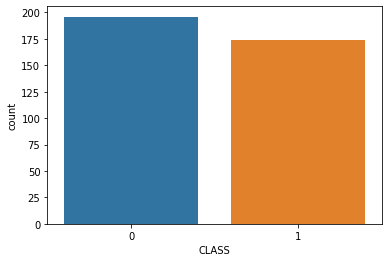

In [11]:
sns.countplot(df.CLASS)

In [13]:
### spam is more than ham
df.CLASS.value_counts()

0    196
1    174
Name: CLASS, dtype: int64

In [15]:
# Applying train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.CONTENT,df.CLASS,test_size = 0.2,random_state = 1)

# Bag of words and ML 
    - Apply CountVectorizer on the column Content
    - Convert the count vectorizer output into a dataframe
    - Apply Naive Bayes and check the metrics


In [16]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [34]:
word_count = count_vect.fit(X_train)
wc=count_vect.fit(X_test)

In [18]:
word_count.get_feature_names()

['00',
 '000',
 '08',
 '10',
 '100',
 '101721377578919894134',
 '108k',
 '128gb',
 '13',
 '14',
 '14gkvdo',
 '15',
 '16gb',
 '17',
 '18',
 '19',
 '1bsefqe',
 '1hmvtx',
 '1m00s',
 '20',
 '200',
 '2004',
 '200mm',
 '2010',
 '2013',
 '2015',
 '23',
 '25',
 '250',
 '320',
 '32gb',
 '33',
 '333',
 '35',
 '360',
 '385',
 '387',
 '39',
 '390',
 '3d',
 '40',
 '4000',
 '421',
 '433',
 '4500',
 '4g',
 '4gb',
 '4netjobs',
 '4th',
 '50',
 '500',
 '5000',
 '510',
 '515',
 '55',
 '550',
 '55mm',
 '5tu9gn1l310',
 '60',
 '600',
 '682',
 '753',
 '7in',
 '860',
 '868',
 'abominable',
 'abomination',
 'about',
 'absolutely',
 'absorbing',
 'account',
 'acquire',
 'acquiring',
 'act',
 'actually',
 'adam',
 'addition',
 'adf',
 'admirable',
 'adore',
 'adroid',
 'advertise',
 'advertisements',
 'advertisiments',
 'affiliated',
 'africa',
 'african',
 'africans',
 'after',
 'again',
 'against',
 'ago',
 'agree',
 'ahead',
 'aid',
 'air',
 'aka',
 'album',
 'all',
 'alot',
 'already',
 'also',
 'always',
 '

In [35]:
# transforming the data:
d_arr=word_count.transform(X_train).toarray()
d_arr2=wc.transform(X_test).toarray()

In [36]:
#Converting to dataframe
feature_matrix = pd.DataFrame(d_arr,columns = word_count.get_feature_names())
feature_matrix_test= pd.DataFrame(d_arr2,columns = wc.get_feature_names())

In [37]:
# Apply Naive Bayes Algorithm
# import BernNB
from sklearn.naive_bayes import BernoulliNB
model_BernNB = BernoulliNB()

In [38]:
model_BernNB.fit(feature_matrix,y_train)    ## training on training data

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [42]:
y_test_pred=model_BernNB.predict(feature_matrix_test)   # testing on testing data

In [43]:
y_test_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        39
           1       0.97      0.80      0.88        35

    accuracy                           0.89        74
   macro avg       0.90      0.89      0.89        74
weighted avg       0.90      0.89      0.89        74



# TF IDF and ML
    - Apply TFIDFfor on column Content
    - Convert the tf-idf output into a dataframe
    - Apply Naive Bayes and check the metrics



In [47]:
# TFIDF Vectorizer
## Importing TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [48]:
#Applying tfidf to data
X_train_transformed = tfidf.fit_transform(X_train)
X_train_transformed

X_test_transformed = tfidf.transform(X_test)
X_test_transformed

<74x1217 sparse matrix of type '<class 'numpy.float64'>'
	with 1072 stored elements in Compressed Sparse Row format>

In [49]:
model_BernNB.fit(X_train_transformed,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [50]:
y_test_pred_tfidf = model_BernNB.predict(X_test_transformed)

In [51]:
print(classification_report(y_test,y_test_pred_tfidf))

              precision    recall  f1-score   support

           0       0.70      0.97      0.82        39
           1       0.95      0.54      0.69        35

    accuracy                           0.77        74
   macro avg       0.83      0.76      0.75        74
weighted avg       0.82      0.77      0.76        74

